# Ch 04-2 확률적 경사 하강법

## 1. 점진적인 학습
**점진적 학습** 또는 **온라인 학습**

그 중 대표적인 점진적 학습 알고리즘 = **확률적 경사 하강법 Stochastic Gradient Descent**

### **경사 하강법** = 모델의 오차(loss)를 최소화하는 방향으로 가중치(weight)를 조금씩 조정하는 방법. 
### 경사 하강법의 종류 3가지
**(1) 배치 경사 하강법 (Batch Gradient Descent)**

- 모든 데이터(전체 배치) 를 사용해서 한 번의 기울기를 계산합니다.
    - 안정적이지만, 데이터가 크면 속도가 매우 느림.
    - 한 번의 갱신 ⇒ 모든 샘플의 평균 기울기 사용
📌 장점: 정확하고 안정적
📌 단점: 계산량이 많고 메모리 많이 사용

**(2) 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)**

한 번의 학습(가중치 업데이트)에 데이터 한 개만 사용합니다.

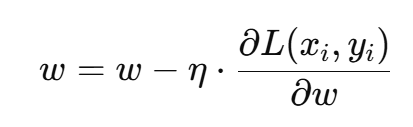
	​
- 매번 다른 샘플을 사용하므로 기울기가 노이즈가 많지만 빠름
- 딥러닝에서도 기초 알고리즘으로 자주 사용
📌 장점: 빠르고 온라인 학습에 적합
📌 단점: 손실이 들쑥날쑥(진동이 많음)

**(3) 미니배치 경사 하강법 (Mini-batch Gradient Descent)**

데이터 전체를 여러 작은 묶음(batch) 으로 나눠서 학습합니다.
(예: 한 번에 32개, 64개 등)

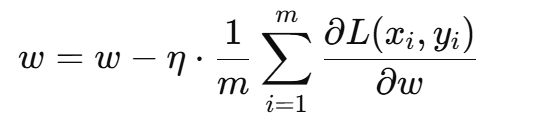
→ 배치와 확률적 방법의 중간 형태

📌 장점: 계산 효율 좋음 (GPU 병렬 처리에 적합), 안정적이면서도 빠름
📌 단점: 배치 크기를 잘 선택해야 함 (너무 크면 느리고, 너무 작으면 불안정)

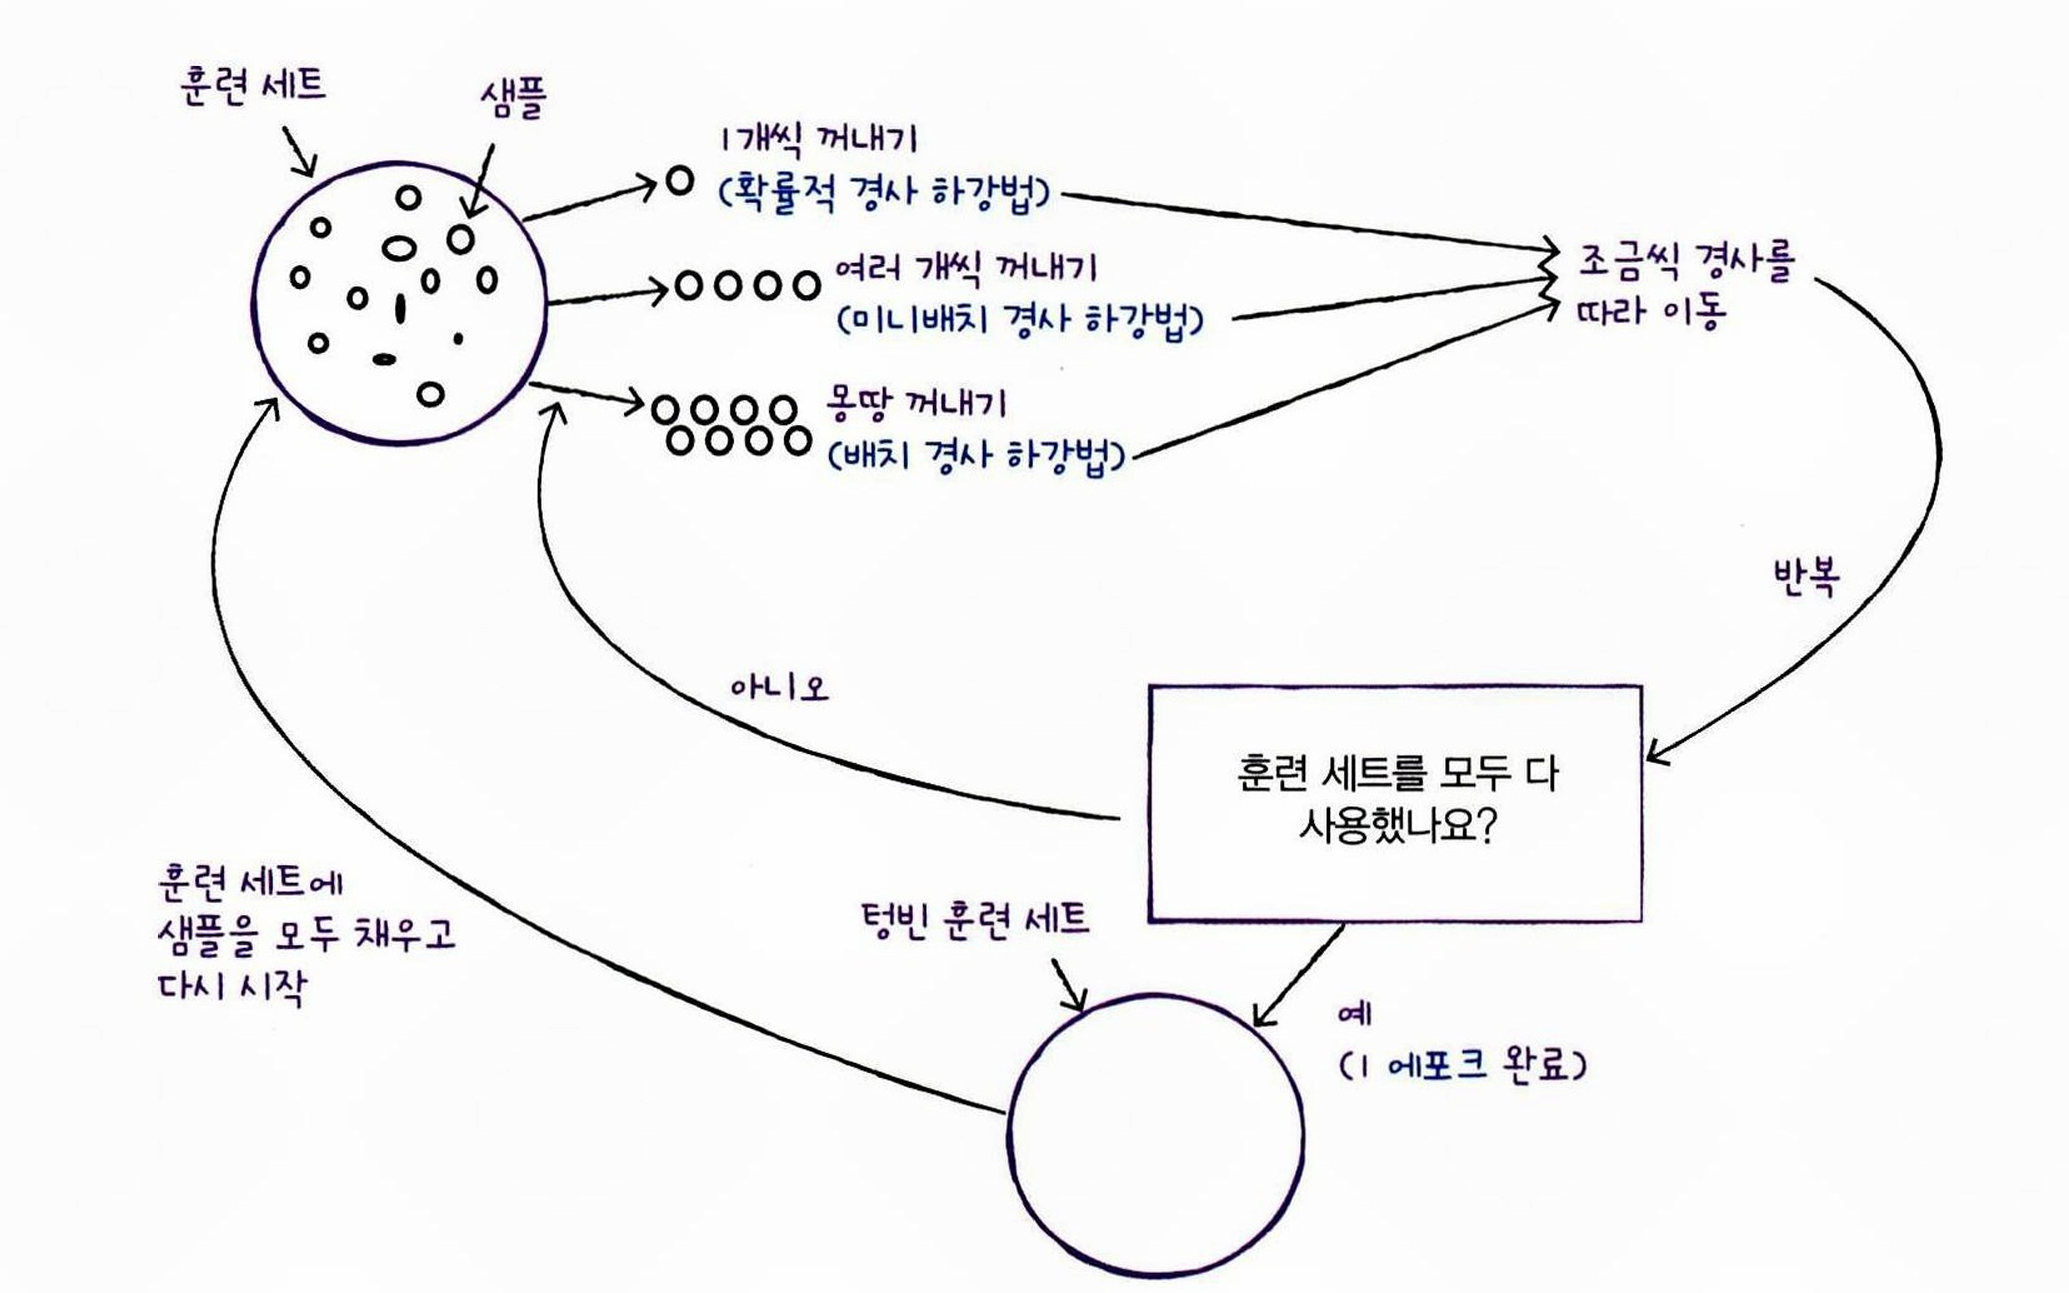


## 1.1 확률적 경사 하강법

* 확률적 = 무작위하게, 랜덤하게 = 전체 샘플이 아니라 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길 찾는다.
* 경사 = 기울기
* 하강법 = 내려가는 방법

가장 가파른 경사를 따라 원하는 지점에 도달하게 하는 것. 그러나, 조금씩 내려오는 것 (조심조심)

* 에포크 epoch = 위와 같은 방식을 만족할 때까지 계속 내려가는데, 훈련 세트를 한 번 모두 사용했다.

## 1.2 손실 함수 loss function
모델이 얼마나 잘못 예측했는지 수치로 나타내는 함수

- 손실(Loss): “하나의 샘플”에 대한 오차
- 비용(Cost) 또는 목적함수(Objective): 모든 샘플에 대한 평균 손실
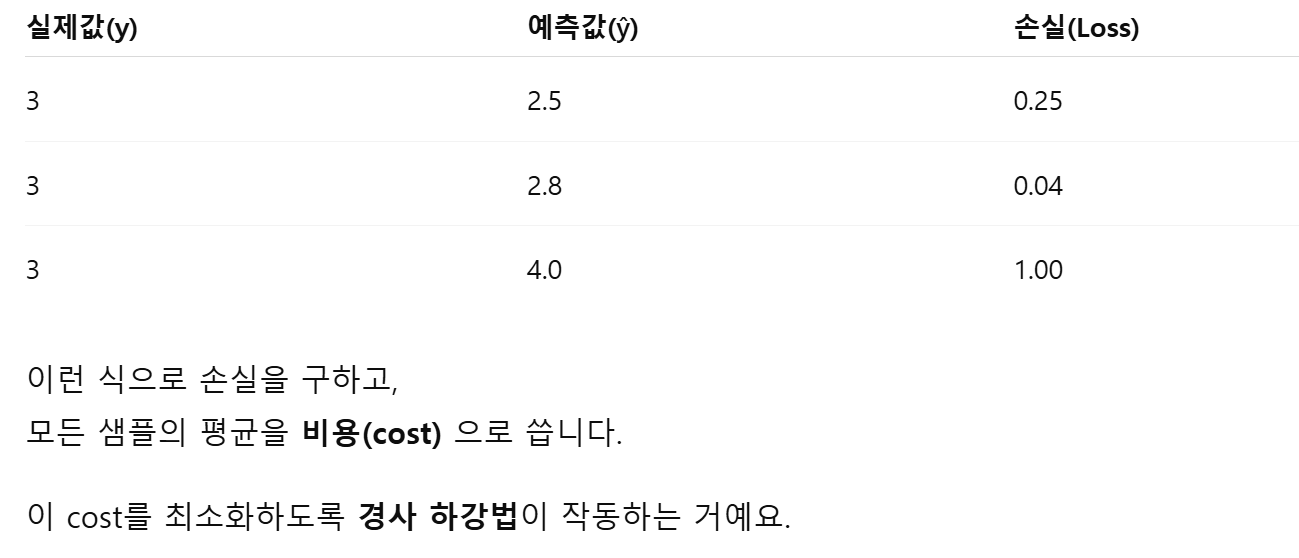

* 분류에서 손실함수 = 정답, 오답 중에 오답 (어차피 0과 1밖에 없는데 손실이면 못맞춘것)

그렇다면, 미분이 가능하게 (연속적이게) 하려면? 
**확률을 사용하면 됨**
 
## 1.3 로지스틱 손실 함수 (aka 이진 크로스엔트로피 손실함수)

손실을 타깃값 x 예측값으로 하게되면 음성 클래스일 때 손실값이 무조건 0이 되어버림.
따라서 log를 사용해야함


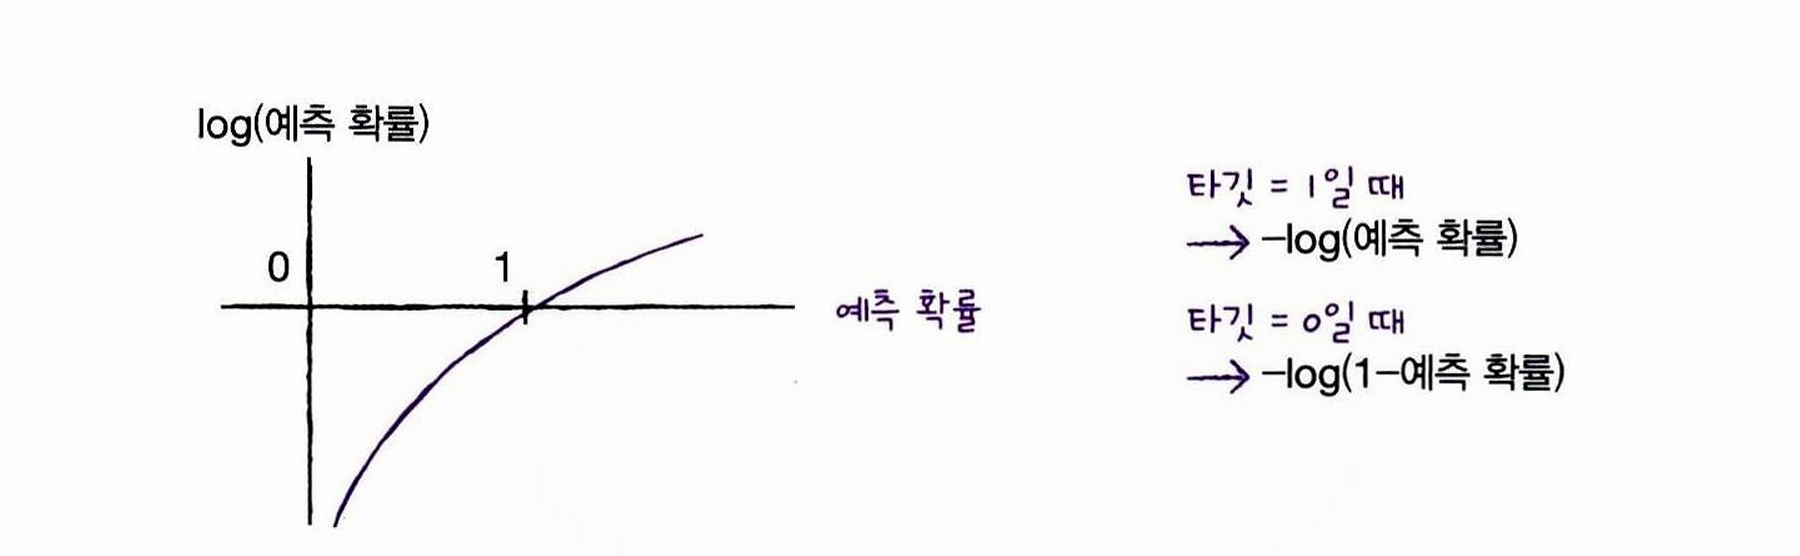
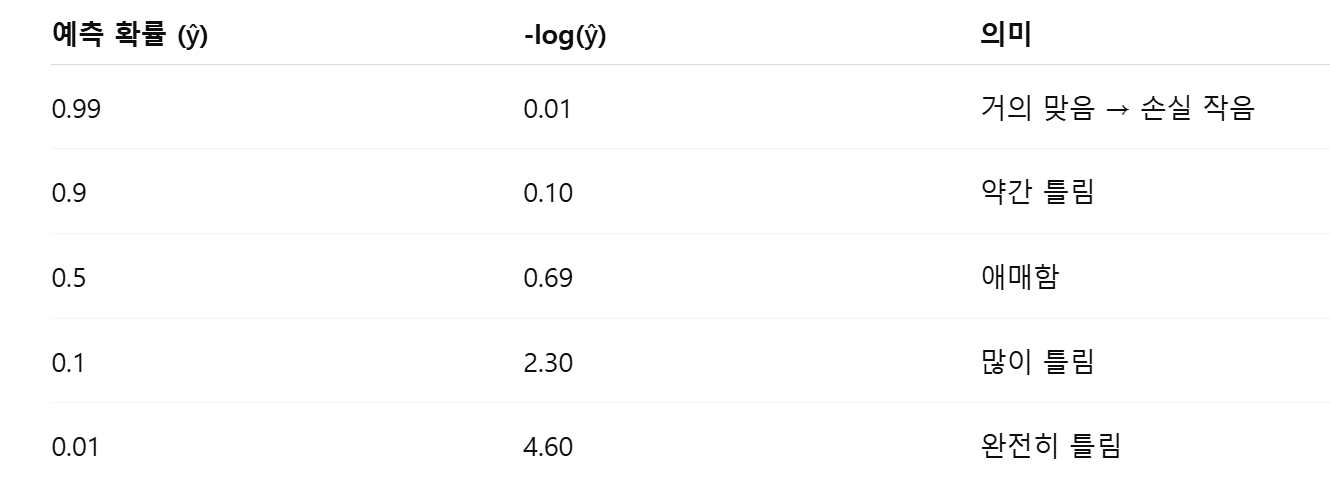

**로지스틱 손실 함수 “손실 = -[y log(ŷ) + (1-y)log(1-ŷ)]”**

다중 분류에서 사용하는 손실 함수 = 크로스엔트로피 손실함수 


# 2. SGDClassifier


In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']] # species 제외 5개 열 사용
fish_target = fish['Species']   # species 열만 타깃으로 사용


In [4]:
#sklearn의 train_test_split으로 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [7]:
#훈련 세트와 테스트 세트의 특성을 표준화 처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)#훈련 세트로 StandardScaler 객체를 만듦
train_scaled = ss.transform(train_input)#훈련 세트를 표준화 변환
test_scaled = ss.transform(test_input)#테스트 세트를 표준화 변환



### 표준화 전처리 시  꼭 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야한다?
1. 표준화(Standardization)란?

데이터의 단위나 크기가 다르면
모델이 특정 특성(feature)에 치우쳐 학습될 수 있습니다.

그래서 평균이 0, 표준편차가 1이 되도록 스케일을 맞춰주는 걸
‘표준화’라고 합니다.

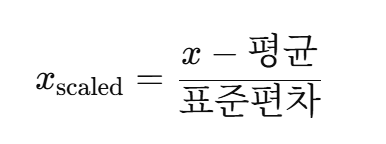


2. 그런데 “훈련 세트로만 fit() 해야 하는 이유”

여기서 중요한 점은:

ss.fit(train_input) 
→ 훈련 세트(train set) 로만 평균(mean)과 표준편차(std)를 구해야 한다는 거예요.

왜냐하면:
* fit() 은 데이터를 보고 평균과 표준편차를 "학습"하는 단계
* transform() 은 그 값을 이용해 실제 변환하는 단계

3. ⚠️ 만약 fit을 테스트 세트에 다시 하면?

테스트 세트의 통계값(평균, 표준편차)을 새로 계산하게 됩니다.
즉, 훈련 데이터에서 본 적 없는 정보를 모델이 미리 알게 되는 셈이에요.

이건 데이터 누출(data leakage) 라고 하며,
테스트 데이터의 정보를 몰래 훔친 것과 같아요 ⚠️

결과적으로 모델의 실제 성능을 과대평가(overestimate) 하게 됩니다.

4. ✅ 그래서 이렇게 해야 합니다

훈련 세트로 평균과 표준편차 계산 (fit)

그 값을 사용해 훈련 세트와 테스트 세트를 모두 변환

ss = StandardScaler()

ss.fit(train_input)            # ① 평균, 표준편차 학습
train_scaled = ss.transform(train_input)  # ② 훈련 세트 변환
test_scaled = ss.transform(test_input)    # ③ 같은 기준으로 테스트 세트 변환


이렇게 하면
훈련 세트와 테스트 세트가 같은 스케일 기준으로 맞춰집니다.

5. 🧠 비유로 이해해보기

학습할 때 사용한 기준(평균, 표준편차)은 “시험 공부한 교재”
시험(Test set) 볼 때도 같은 교재 기준으로 평가해야 공정하죠.

만약 시험 문제를 보고 새 기준을 만들면? → 부정행위(데이터 누출)!

In [5]:
from sklearn.linear_model import SGDClassifier #SGDClassifier 불러오기

In [8]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) #로지스틱 회귀를 수행하는 SGDClassifier 객체 생성
sc.fit(train_scaled, train_target) #훈련 세트로 SGDClassifier 객체를 만듦
print(sc.score(train_scaled, train_target)) #훈련 세트 점수 출력
print(sc.score(test_scaled, test_target)) #테스트 세트 점수 출력

0.773109243697479
0.775


/home/hykim/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


* loss = 손실 함수의 종류 지정. 
    - log_loss = 로지스틱 손실 함수
        -  이진 분류 모델을 만듦
* max_iter = 수행할 에포크 횟수 
    - 10 = 전체 훈련 세트 10번 반복

결과값이 0.77... 로 훈련 세트와 테스트 세트 정확도가 낮음
-> 반복 횟수가 부족한듯.

SGDClassifier 개체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련할 수 있는 **확률적 경사 하강법**

모델을 이어서 훈련할 때 **partial_fit()**을 사용
- 1 에포크씩 이어서 훈련할 수 잇음


In [9]:
sc.partial_fit(train_scaled, train_target) #훈련 세트로 모델을 이어서 훈련
print(sc.score(train_scaled, train_target)) #훈련 세트 점수 출력
print(sc.score(test_scaled, test_target)) #테스트 세트 점수 출력

0.7983193277310925
0.775


조금 향상된 것을 확인할 수 있음.
얼만큼 반복 훈련해야할까?

## 2. 에포크와 과대/과소 적합

에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습함. = 과소 적합
그러나 반대로 횟수가 너무 많아도 점수가 나쁜 과대 적합이 될 수 있음

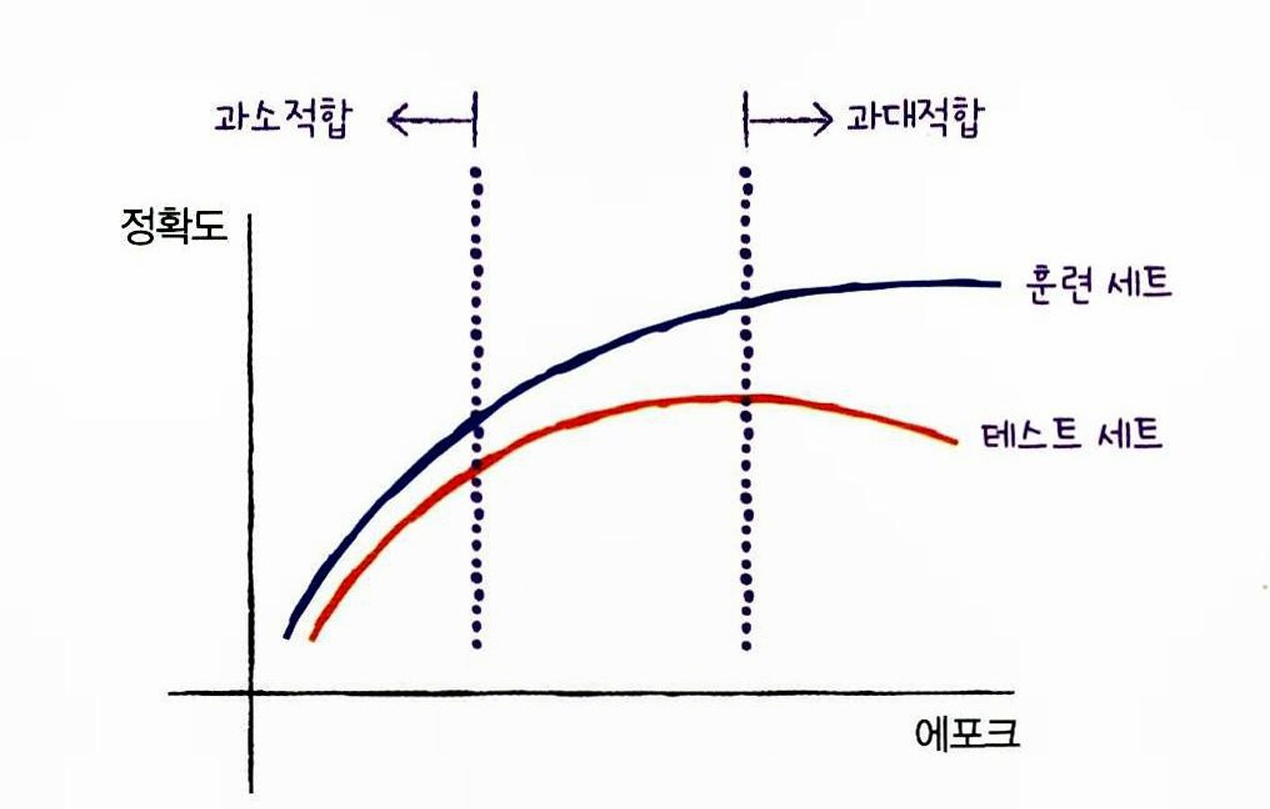

따라서, 과대적합이 되기 직전에 훈련을 멈추는 것을 **조기 종료 early stopping**이라고 함.


In [10]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42) #SGDClassifier 객체 생성
train_score = [] 
test_score = [] 
classes = np.unique(train_target) #고유한 타깃 클래스 배열 생성

In [ ]:
for _ in range(300): #300번 반복
    sc.partial_fit(train_scaled, train_target, classes=classes) #부분 훈련 수행
    train_score.append(sc.score(train_scaled, train_target)) #훈련 세트 점수 저장
    test_score.append(sc.score(test_scaled, test_target)) #테스트 세트 점수 저장

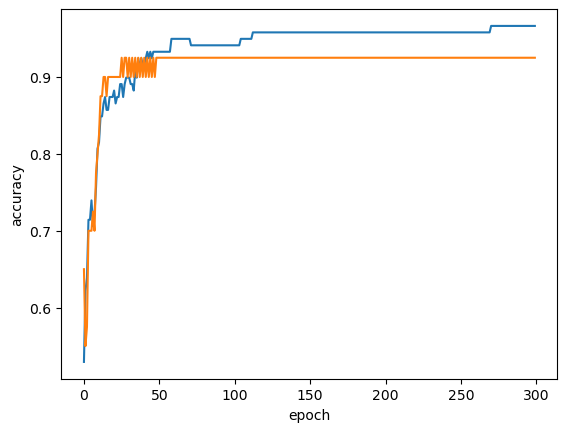

In [ ]:
#300번 반복하는 동안 훈련 세트와 테스트 세트의 점수를 그려보기
import matplotlib.pyplot as plt
plt.plot(train_score) #훈련 세트 점수 그래프 그리기 = 파란색
plt.plot(test_score)  #테스트 세트 점수 그래프 그리기 = 주황색 
plt.xlabel('epoch') #x축 이름
plt.ylabel('accuracy') #y축 이름
plt.show()

100 번째 이전에는 과소적합. 100번째 이후로 두 세트 사이가 벌어지는 것을 알 수 있음
반복 횟수를 100에 맞추고 다시 모델 훈련

여기서는 sgd를 사용한게 아니라 partial_fit을 직접 300번 호출한 것 

In [13]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None,  random_state=42) #반복 횟수를 100으로 지정
sc.fit(train_scaled, train_target) #훈련 세트로 SGDClassifier 객체를 만듦
print(sc.score(train_scaled, train_target)) #훈련 세트 점수 출력    
print(sc.score(test_scaled, test_target)) #테스트 세트 점수 출력


0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
tol 로 향상될 최솟값을 지정.
tol = None으로 한 것은 자동으로 멈추지 않게 하는 것
### Early stopping
- 조건
    - loss나 점수가 더이상 tol 값보다 많이 향상되지 않는 상태가 
    - n_iter_no_change 번 연속되면 학습 중단

- tol = 개선 폭의 기준 값
- n_iter_no_change = 그 기준 이하로 향상이 없을 때 기다릴 epoch 수

예를 들면
```
sc = SGDClassifier(
    loss='log_loss',
    max_iter=1000,           # 최대 반복 횟수
    tol=1e-3,                # 향상 폭이 0.001 미만이면 중단 고려
    n_iter_no_change=5,      # 5 epoch 연속으로 향상 없으면 멈춤
    random_state=42
)

```




### hinge loss
서포트 벡터 머신이라고 불리는 또 다른 머신러닝 알고리즘을 위한손실 함수 



In [14]:
# hinge loss 를 이용한 모델 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) #hinge 손실 함수를 사용하는 SGDClassifier 객체 생성
sc.fit(train_scaled, train_target) #훈련 세트로 SGDClassifier 객체를 만듦
print(sc.score(train_scaled, train_target)) #훈련 세트 점수 출력
print(sc.score(test_scaled, test_target)) #테스트 세트 점수 출력


0.9495798319327731
0.925
